# WoS Notebook 02:

# Metadata Analysis of Web of Science Data

This notebook uses a data file of WoS merged in the previous notebook (notebook "01").

## 0. Setup

### Import files if using Google Colab

If using Colab, uncomment out the cell below and run.

In [12]:
##Option 1:
#!wget https://git.dartmouth.edu/lib-digital-strategies/RDS/projects/bibliometrics/-/archive/main/bibliometrics-main.zip
#!unzip bibliometrics-main.zip

##Option 2:
#!git clone https://git.dartmouth.edu/lib-digital-strategies/RDS/projects/bibliometrics.git

### Import Packages

In [13]:
import sys
sys.path.insert(0, '../code')
import wos_functions

import pandas as pd 
from pathlib import Path
import collections
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

**Note: we renamed the WoS columns for "merged_wos_subcols.csv". If you are using another WoS csv then you may need to use original WoS column headers.

In [14]:
inputdir = Path("../data/resilience/merged")
data = pd.read_csv(Path(inputdir, "merged_wos_subcols.csv"), encoding = 'utf-8', index_col=[0])
data.head()

,pub_type,author,au_fullnames,title,so_title,language,doc_type,au_keywords,keywords_plus,abstract,...,ISSN,eISSN,ISBN,DOI,wos_id,journal_iso,pub_data,pub_year,wos_categs,wos_res_areas
0,J,"Jiang, YW; Ritchie, BW; Verreynne, ML","Jiang, Yawei; Ritchie, Brent W.; Verreynne, Ma...",Developing disaster resilience: A processual a...,TOURISM MANAGEMENT,English,Article,Disaster resilience; Dynamic capabilities; Res...,LONGITUDINAL-FIELD RESEARCH; ORGANIZATIONAL RE...,This study takes a processual view of resilien...,...,0261-5177,1879-3193,NaN,10.1016/j.tourman.2021.104374,WOS:000713714900002,Tourism Manage.,DEC,2021,"Environmental Studies; Hospitality, Leisure, S...",Environmental Sciences & Ecology; Social Scien...
1,J,"Nystrom, M; Graham, NAJ; Lokrantz, J; Norstrom...","Nystrom, M.; Graham, N. A. J.; Lokrantz, J.; N...",Capturing the cornerstones of coral reef resil...,CORAL REEFS,English,Review,Diversity; Functional groups; Management; Phas...,GREAT-BARRIER-REEF; CATASTROPHIC REGIME SHIFTS...,Coral reefs can undergo unexpected and dramati...,...,0722-4028,1432-0975,NaN,10.1007/s00338-008-0426-z,WOS:000260616400011,Coral Reefs,DEC,2008,Marine & Freshwater Biology,Marine & Freshwater Biology
2,J,"Cassidy, S","Cassidy, Simon",The Academic Resilience Scale (ARS-30): A New ...,FRONTIERS IN PSYCHOLOGY,English,Article,resilience; academic resilience; adversity; me...,CONNOR-DAVIDSON RESILIENCE; CD-RISC; BUOYANCY;...,Resilience is a psychological construct observ...,...,1664-1078,NaN,NaN,10.3389/fpsyg.2016.01787,WOS:000388022000001,Front. Psychol.,NOV 18,2016,"Psychology, Multidisciplinary",Psychology
3,J,"Adeyeye, K; Emmitt, S","Adeyeye, Kemi; Emmitt, Stephen","Multi-scale, integrated strategies for urban f...",INTERNATIONAL JOURNAL OF DISASTER RESILIENCE I...,English,Article,Governance; Integration; Flooding; Resilience;...,CLIMATE; SUSTAINABILITY; CHALLENGES; PERSPECTI...,Purpose - This study aims to determine and con...,...,1759-5908,1759-5916,NaN,10.1108/IJDRBE-11-2016-0044,WOS:000425493200003,Int. J. Disaster Resil. Built Environ.,NaN,2017,Environmental Studies,Environmental Sciences & Ecology
4,J,"Wiig, S; Haraldseid-Driftland, C; Dombestein, ...","Wiig, Siri; Haraldseid-Driftland, Cecilie; Dom...",Backstage researching resilience researchers -...,INTERNATIONAL JOURNAL OF HEALTH GOVERNANCE,English,Review,Resilience in healthcare; Researching research...,NaN,PurposeResilience in healthcare is fundamental...,...,2059-4631,NaN,NaN,10.1108/IJHG-07-2022-0068,WOS:000904828800001,Int. J. Health Gov.,MAR 27,2023,Health Policy & Services,Health Care Sciences & Services


## 1. Summarize Data

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pub_type             3000 non-null   object
 1   author               3000 non-null   object
 2   au_fullnames         3000 non-null   object
 3   title                3000 non-null   object
 4   so_title             3000 non-null   object
 5   language             3000 non-null   object
 6   doc_type             3000 non-null   object
 7   au_keywords          2987 non-null   object
 8   keywords_plus        2382 non-null   object
 9   abstract             3000 non-null   object
 10  res_ids              1521 non-null   object
 11  ORCID                1928 non-null   object
 12  cited_references     2980 non-null   object
 13  times_cited_wos      3000 non-null   int64 
 14  times_cited_all      3000 non-null   int64 
 15  usage_180days        3000 non-null   int64 
 16  usage_since2

In [16]:
data.describe()

,times_cited_wos,times_cited_all,usage_180days,usage_since2013,pub_year
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,35.411667,36.727333,7.416667,43.746000,2017.685667
std,148.905193,155.906855,15.643997,93.720389,4.269614
min,0.000000,0.000000,0.000000,0.000000,1995.000000
25%,1.000000,1.000000,0.000000,6.000000,2015.000000
50%,7.000000,7.000000,3.000000,18.000000,2019.000000
75%,26.000000,27.000000,7.000000,47.250000,2021.000000
max,4757.000000,5006.000000,238.000000,2478.000000,2023.000000


## 2. Visualize Papers over Time

In [17]:
#wos_yrs = data.groupby("PY").size()
wos_yrs = data.groupby("pub_year").size()
wos_yrs

pub_year
1995      3
1997      2
1998      5
1999      2
2000      2
2001      4
2002      7
2003      5
2004      3
2005     14
2006     30
2007     15
2008     19
2009     29
2010     46
2011     40
2012     61
2013     96
2014    244
2015    194
2016    185
2017    203
2018    285
2019    282
2020    316
2021    333
2022    366
2023    209
dtype: int64

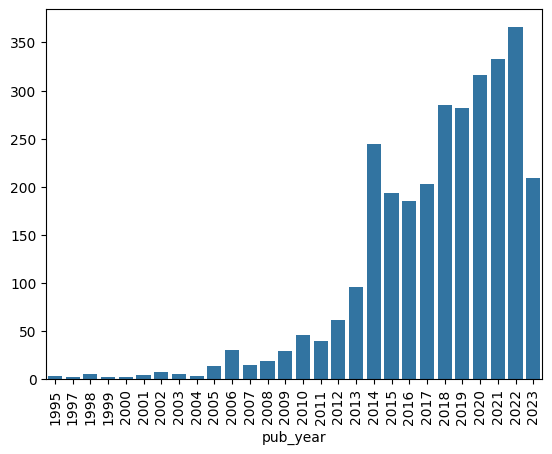

In [18]:
sns.barplot(wos_yrs)
plt.xticks(rotation=90);

## Visualize Distribution of Papers by WoS Group

## Analysis of Web of Science Groups

The Web of Science places each article or paper into at least one, and often multiple, [WoS categories](https://jcr.clarivate.com/jcr/browse-category-list) (254 total available categories). If your Web of Science dataset is narrowly focused in one discipline, then an analysis of these categories could be fruitful.

However, if the search criteria you used to create your dataset is large, then you will want to aggregate these 254 possible categories into a narrower range of groups. Fortunately, the WoS assigns each of these 254 categories into a narrower range of [21 groups](https://jcr.clarivate.com/jcr/browse-categories). Unfortunately, the WoS links many of these 254 categories with multiple groups. Thus, the aggregation of your dataset from categories to groups is not a straightforward process.

Thus, I have created the following functions that each return a new dataframe:
1. **wos_add_and_explode_groups()**: returns your original dataframe with a new column identifying the group(s) matching each paper / category
2. **wos_groupby_Groups**: a summary dataframe grouping your original data by WoS Group.



In [19]:
data_explode = wos_functions.wos_add_and_explode_groups(data)

original dataset has 3000 rows and 30 columns
exploding by wos_categ (wos_categs) produces a df           with 5544 rows and 31 columns
after adding in WoS groups and also exploding by groups,             the resulting df has                 8571 rows and 33 columns


In [20]:
groupsdf = wos_functions.wos_groupby_Groups(data_explode)
groupsdf.head()

,group_ct,Group,categ_ct,journal_ct,citableitem_ct,numitems_insample_per100kinWOS
6,1038,Economics & Business,21,3394,240626,431.374831
18,572,Psychiatry/Psychology,16,1531,135062,423.509203
20,198,Visual & Performing Arts,10,921,47202,419.473751
19,1302,"Social Sciences, General",41,6450,354940,366.822562
8,690,Environment/Ecology,13,1721,286983,240.432360


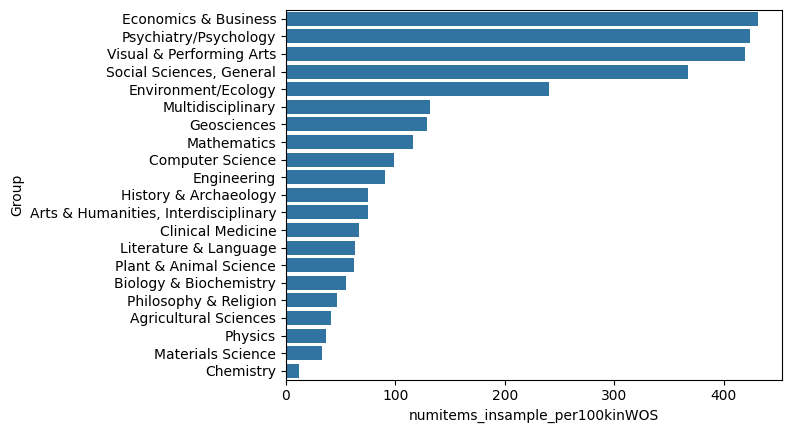

In [21]:
sns.barplot(groupsdf, y="Group", x="numitems_insample_per100kinWOS");

## Group by WoS Group *and* Year

In [22]:
data_yr_group = data_explode.groupby(["Group", "pub_year"])["pub_type"].count().reset_index(name="yr_ct")
# data_yr_group = data_explode.groupby(["Group", "PY"])["PT"].count().reset_index(name="yr_ct")

KeyError: "['PY'] not in index"

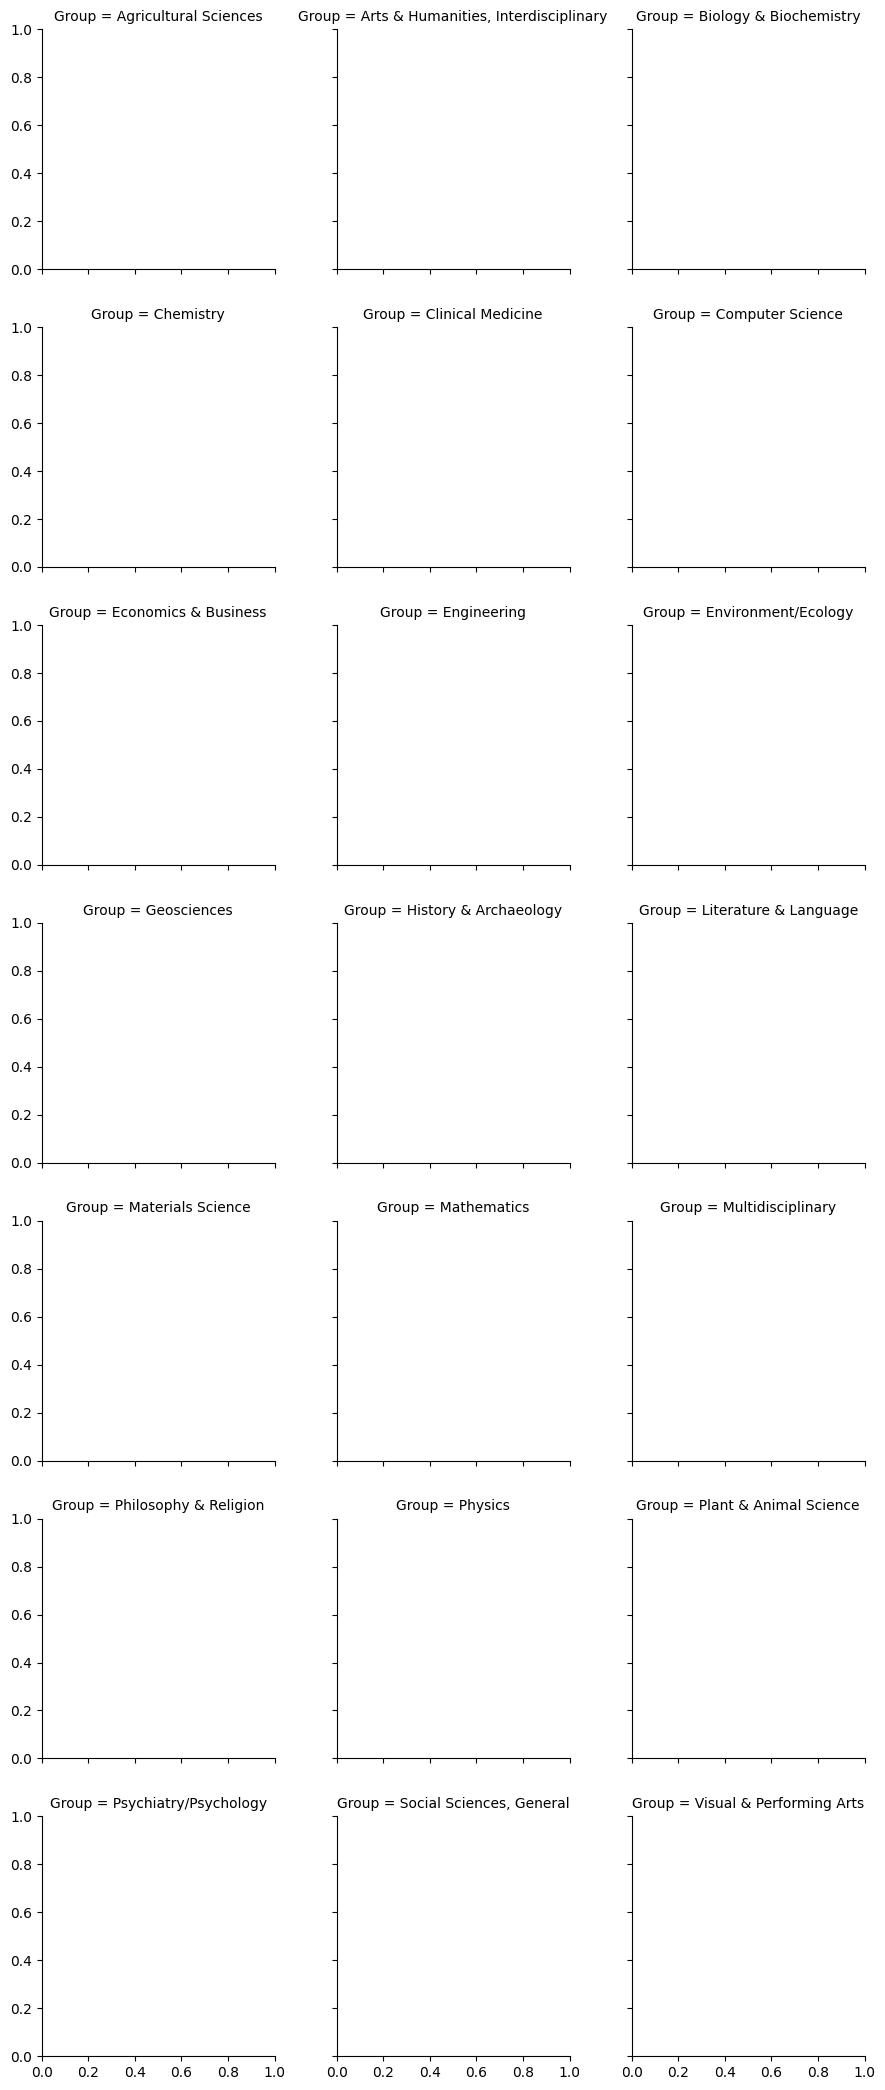

In [ ]:
# code for creating the faceted grid of area graphs below is 
## adapted from: https://python-graph-gallery.com/242-area-chart-and-faceting/

# Create a grid : initialize it
g = sns.FacetGrid(data_yr_group, col="Group", hue="Group", col_wrap = 3)

# Add the line over the area with the plot function
# g = g.map(plt.plot, 'PY', 'yr_ct')
g = g.map(plt.plot, 'pub_year', 'yr_ct')

# Fill the area with fill_between
# g = g.map(plt.fill_between, 'PY', 'yr_ct', alpha=0.2).set_titles("{col_name}")
g = g.map(plt.fill_between, 'PY', 'yr_ct', alpha=0.2).set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.figure.suptitle('Frequency of use of keyword "resilience" in Web of Science database')

What can you learn from the above graphs? What changes would you want to make to more clearly discern patterns in scholarship?